In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#ABC Classification

In [ ]:
def abc(cum):
  if cum <= 0.8:
    return 'A'
  elif cum <= 0.95:
    return 'B'
  else:
    return 'C'

In [ ]:
def category(arg):
  if arg == "AAA":
    return 'W'
  elif arg ==  "AAB":
    return 'W'
  elif arg == "ABA":
    return 'W'
  elif arg == "ABB":
    return 'W'
  elif arg == "ACA":
    return 'W'
  elif arg == "BAA":
    return 'W'
  elif arg == "BBA":
    return 'W'
  elif arg == "AAC":
    return 'D'
  elif arg == "ABC":
    return 'D'
  elif arg == "ACB":
    return 'D'
  elif arg == "ACC":
    return 'D'
  elif arg == "BAB":
    return 'D'
  elif arg == "BAC":
    return 'D'
  elif arg == "BBB":
    return 'D'
  elif arg == "BBC":
    return 'D'
  elif arg == "BCA":
    return 'D'
  elif arg == "CAA":
    return 'D'
  elif arg == "CAB":
    return 'D'
  elif arg == "CBA":
    return 'D'
  elif arg == "BCB":
    return 'И'
  elif arg == "BCC":
    return 'И'
  elif arg == "CAC":
    return 'И'
  elif arg == "CBB":
    return 'И'
  elif arg == "CBC":
    return 'И'
  else:
    return 'В'

In [ ]:
#df = pd.read_csv('Medizdeliya.csv', delimiter=';', encoding ="cp1251")

In [ ]:
df = pd.read_excel('Medizdeliya.xlsx')

In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,Unnamed: 0,Артикул,Название товара,Единица измерения,Схема вложения упаковки,Признак-категория,СОХ,ХСЗ,БН,ТН,...,"2023_04(C) Валовая прибыль, руб","2023_04(D) Возврат брака от клиента на склад, шт","2023_05(A) Объем реализации, шт","2023_05(B) Реализация (себ), руб","2023_05(C) Валовая прибыль, руб","2023_05(D) Возврат брака от клиента на склад, шт","2023_06(A) Объем реализации, шт","2023_06(B) Реализация (себ), руб","2023_06(C) Валовая прибыль, руб","2023_06(D) Возврат брака от клиента на склад, шт"
0,0.0,1000358,Журнал регистрации температуры в холодильном о...,шт.,1,W,1SH,Т10,ТР Комус Медицина,Медицинские товары,...,5465.090149,0.0,178.0,14240.713991,5161.356009,0.0,141.0,11280.260564,5710.069436,0.0
1,0.0,1000402,"Игла инъекционная 23G (0,6х25 мм) Komar Россия...",уп.,1/[100],П,1SH,Т10,ТР Комус Медицина,Медицинские товары,...,1249.475267,0.0,90.0,7912.178427,2615.801573,0.0,32.0,2813.194265,1051.625735,0.0
2,0.0,1000752,"Гигрометр психрометрический ВИТ-1, Термоприбор...",шт.,1/[10]/<500>,П,1SH,Т10,ТР Комус Медицина,Медицинские товары,...,239350.417418,0.0,546.0,564169.940262,495574.439738,0.0,72.0,77125.899269,48520.710731,1.0
3,0.0,1000881,"Предметы мед.назнач-я Берет Protect Universal,...",уп.,1/[8],И,1SH,Т10,ТР Комус Медицина,Медицинские товары,...,63452.424974,0.0,1.0,2643.848831,1851.151169,0.0,1.0,2643.854370,1851.145630,0.0
4,0.0,1000883,Халат хирургический стерил. Protect Standard ...,уп.,[1],И,1SH,Т10,ТР Комус Медицина,Медицинские товары,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
df1 = pd.read_excel('Aclbs.xlsx')

In [ ]:
df1.head()

,Артикул,Наименование_товара,АКБ
0,1000358,Журнал регистрации температуры в холодильном о...,331
1,1000402,"Игла инъекционная 23G (0,6х25 мм) Komar Россия...",62
2,1000752,"Гигрометр психрометрический ВИТ-1, Термоприбор...",88
3,1000801,(пусто),1
4,1000881,"Предметы мед.назнач-я Берет Protect Universal,...",4


Формируем нужные колонки

In [ ]:
df_r = df[['Артикул', 'Признак-категория', 'ТК', 'ТГ','АГ']]


Расчитываем показатели за 6 месяцев

In [ ]:
df_r['turn_over'] = df['2022_12(B) Реализация (себ), руб']+df['2022_12(C) Валовая прибыль, руб']+\
                    df['2023_01(B) Реализация (себ), руб']+df['2023_01(C) Валовая прибыль, руб']+\
                    df['2023_02(B) Реализация (себ), руб']+df['2023_02(C) Валовая прибыль, руб']+\
                    df['2023_03(B) Реализация (себ), руб']+df['2023_03(C) Валовая прибыль, руб']+\
                    df['2023_04(B) Реализация (себ), руб']+df['2023_04(C) Валовая прибыль, руб']+\
                    df['2023_05(B) Реализация (себ), руб']+df['2023_05(C) Валовая прибыль, руб']

<ipython-input-13-f975f9ba5a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['turn_over'] = df['2022_12(B) Реализация (себ), руб']+df['2022_12(C) Валовая прибыль, руб']+\


In [ ]:
df_r['revenue'] = df['2022_12(C) Валовая прибыль, руб'] + df['2023_01(C) Валовая прибыль, руб']+\
                  df['2023_02(C) Валовая прибыль, руб'] + df['2023_03(C) Валовая прибыль, руб']+\
                  df['2023_04(C) Валовая прибыль, руб'] + df['2023_05(C) Валовая прибыль, руб']

<ipython-input-14-31bbcc2baf2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['revenue'] = df['2022_12(C) Валовая прибыль, руб'] + df['2023_01(C) Валовая прибыль, руб']+\


In [ ]:
df_r['total_qty'] = df['2022_12(A) Объем реализации, шт'] + df['2023_01(A) Объем реализации, шт']+\
                    df['2023_02(A) Объем реализации, шт'] + df['2023_03(A) Объем реализации, шт']+\
                    df['2023_04(A) Объем реализации, шт'] + df['2023_05(A) Объем реализации, шт']

<ipython-input-15-2b4c1465c2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['total_qty'] = df['2022_12(A) Объем реализации, шт'] + df['2023_01(A) Объем реализации, шт']+\


Отбираем категории матрицы для расчета

In [ ]:
df_r_filtred = df_r[(df_r['Признак-категория'] == 'D') | (df_r['Признак-категория'] == 'W') | (df_r['Признак-категория'] == 'S') |\
                    (df_r['Признак-категория'] == 'П') | (df_r['Признак-категория'] == 'И')]


Расчитываем проценты по ТК

In [ ]:
df_r_filtred['%TObyTK']=df_r_filtred['turn_over'] / df_r_filtred.groupby('ТК')['turn_over'].transform('sum')
df_r_filtred['%RVbyTK']=df_r_filtred['revenue'] / df_r_filtred.groupby('ТК')['revenue'].transform('sum')
df_r_filtred['%QTYbyTK']=df_r_filtred['total_qty'] / df_r_filtred.groupby('ТК')['total_qty'].transform('sum')


Расчитываем проценты по ТГ

In [ ]:
df_r_filtred['%TObyTG']=df_r_filtred['turn_over'] / df_r_filtred.groupby('ТГ')['turn_over'].transform('sum')
df_r_filtred['%RVbyTG']=df_r_filtred['revenue'] / df_r_filtred.groupby('ТГ')['revenue'].transform('sum')
df_r_filtred['%QTYbyTG']=df_r_filtred['total_qty'] / df_r_filtred.groupby('ТГ')['total_qty'].transform('sum')

Расчитываем проценты по АГ

In [ ]:
df_r_filtred['%TObyAG']=df_r_filtred['turn_over'] / df_r_filtred.groupby('АГ')['turn_over'].transform('sum')
df_r_filtred['%RVbyAG']=df_r_filtred['revenue'] / df_r_filtred.groupby('АГ')['revenue'].transform('sum')
df_r_filtred['%QTYbyAG']=df_r_filtred['total_qty'] / df_r_filtred.groupby('АГ')['total_qty'].transform('sum')

Считаем нарастающий итог по ТК

In [ ]:
df_r_filtred['TObyTK_cum'] = df_r_filtred.sort_values('%TObyTK', ascending=False).groupby('ТК')['%TObyTK'].cumsum()
df_r_filtred['RVbyTK_cum'] = df_r_filtred.sort_values('%RVbyTK', ascending=False).groupby('ТК')['%RVbyTK'].cumsum()
df_r_filtred['QTYbyTK_cum'] = df_r_filtred.sort_values('%QTYbyTK', ascending=False).groupby('ТК')['%QTYbyTK'].cumsum()

Считаем нарастающий итог по ТГ

In [ ]:
df_r_filtred['TObyTG_cum'] = df_r_filtred.sort_values('%TObyTG', ascending=False).groupby('ТГ')['%TObyTG'].cumsum()
df_r_filtred['RVbyTG_cum'] = df_r_filtred.sort_values('%RVbyTG', ascending=False).groupby('ТГ')['%RVbyTG'].cumsum()
df_r_filtred['QTYbyTG_cum'] = df_r_filtred.sort_values('%QTYbyTG', ascending=False).groupby('ТГ')['%QTYbyTG'].cumsum()

Считаем нарастающий итог по АГ

In [ ]:
df_r_filtred['TObyAG_cum'] = df_r_filtred.sort_values('%TObyAG', ascending=False).groupby('АГ')['%TObyAG'].cumsum()
df_r_filtred['RVbyAG_cum'] = df_r_filtred.sort_values('%RVbyAG', ascending=False).groupby('АГ')['%RVbyAG'].cumsum()
df_r_filtred['QTYbyAG_cum'] = df_r_filtred.sort_values('%QTYbyAG', ascending=False).groupby('АГ')['%QTYbyAG'].cumsum()

Присваиваем Категории по ТК

In [ ]:
df_r_filtred['Cat_TObyTK'] = df_r_filtred['TObyTK_cum'].apply(abc)
df_r_filtred['Cat_RVbyTK'] = df_r_filtred['RVbyTK_cum'].apply(abc)
df_r_filtred['Cat_QTYbyTK'] = df_r_filtred['QTYbyTK_cum'].apply(abc)

Присваиваем категории по ТГ

In [ ]:
df_r_filtred['Cat_TObyTG'] = df_r_filtred['TObyTG_cum'].apply(abc)
df_r_filtred['Cat_RVbyTG'] = df_r_filtred['RVbyTG_cum'].apply(abc)
df_r_filtred['Cat_QTYbyTG'] = df_r_filtred['QTYbyTG_cum'].apply(abc)

Присваиваем категории по АГ

In [ ]:
df_r_filtred['Cat_TObyAG'] = df_r_filtred['TObyAG_cum'].apply(abc)
df_r_filtred['Cat_RVbyAG'] = df_r_filtred['RVbyAG_cum'].apply(abc)
df_r_filtred['Cat_QTYbyAG'] = df_r_filtred['QTYbyAG_cum'].apply(abc)

Рассмотрим результаты анализа по ТК

In [83]:
df_abc_byTK = df_r_filtred.groupby('Cat_TObyTK').agg(
    total_skus=('Артикул', 'nunique'),
    total_units=('total_qty', sum),
    total_turn_over=('turn_over', sum),
).reset_index()

df_abc_byTK

,Cat_TObyTK,total_skus,total_units,total_turn_over
0,A,1337,6214717.0,1.238139e+09
1,B,1660,1612704.0,2.356221e+08
2,C,5403,465681.0,7.865646e+07


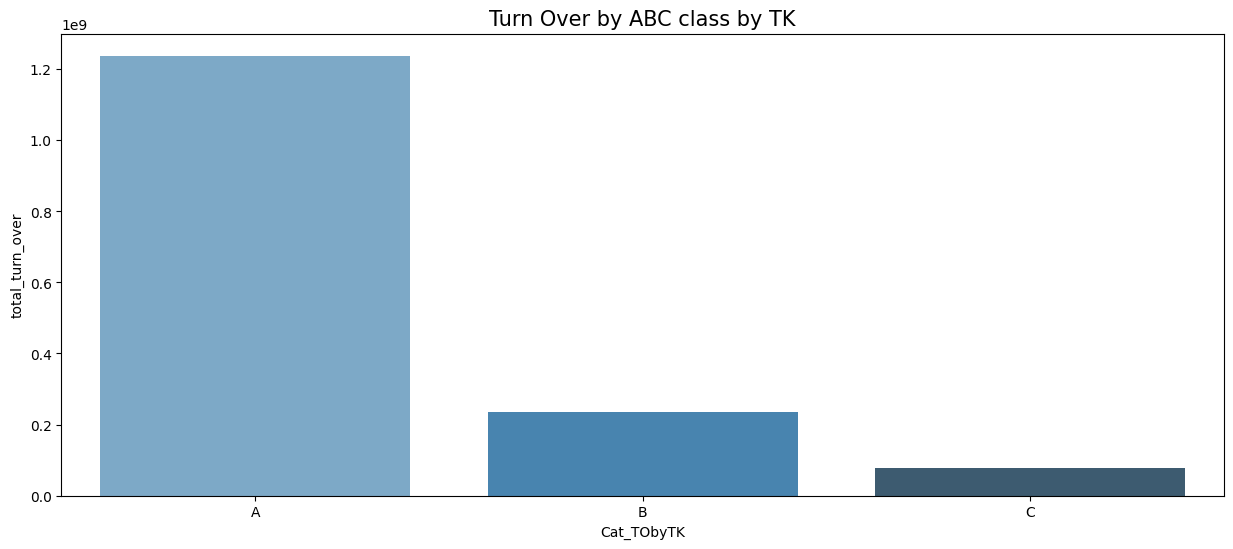

In [85]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="Cat_TObyTK",
                 y="total_turn_over",
                 data=df_abc_byTK,
                 palette="Blues_d")\
                .set_title("Turn Over by ABC class by TK",fontsize=15)

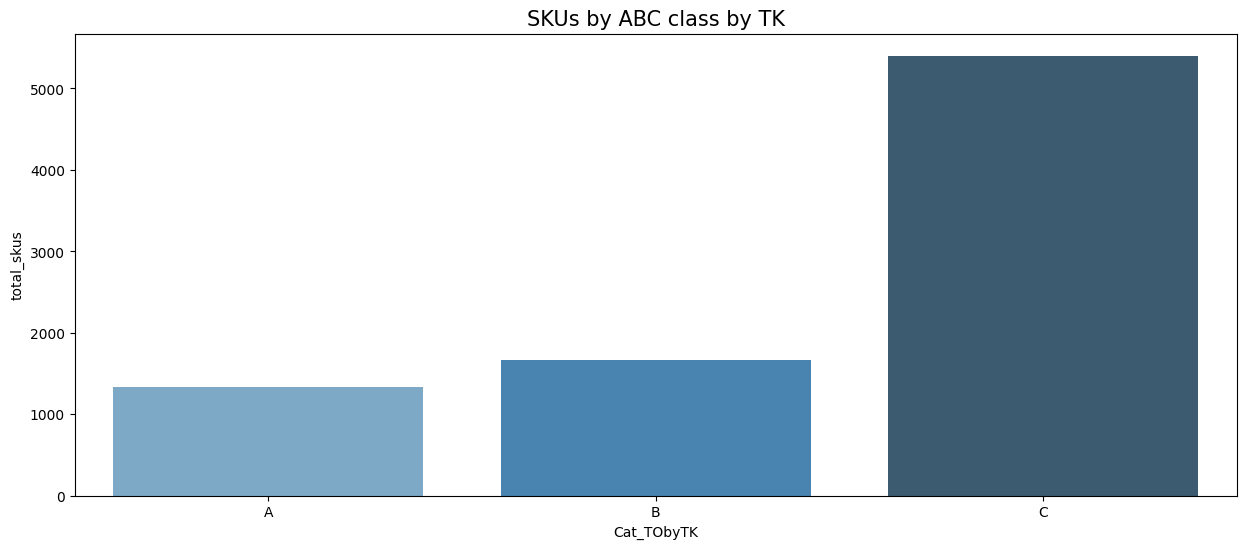

In [86]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="Cat_TObyTK",
                 y="total_skus",
                 data=df_abc_byTK,
                 palette="Blues_d")\
                .set_title("SKUs by ABC class by TK",fontsize=15)

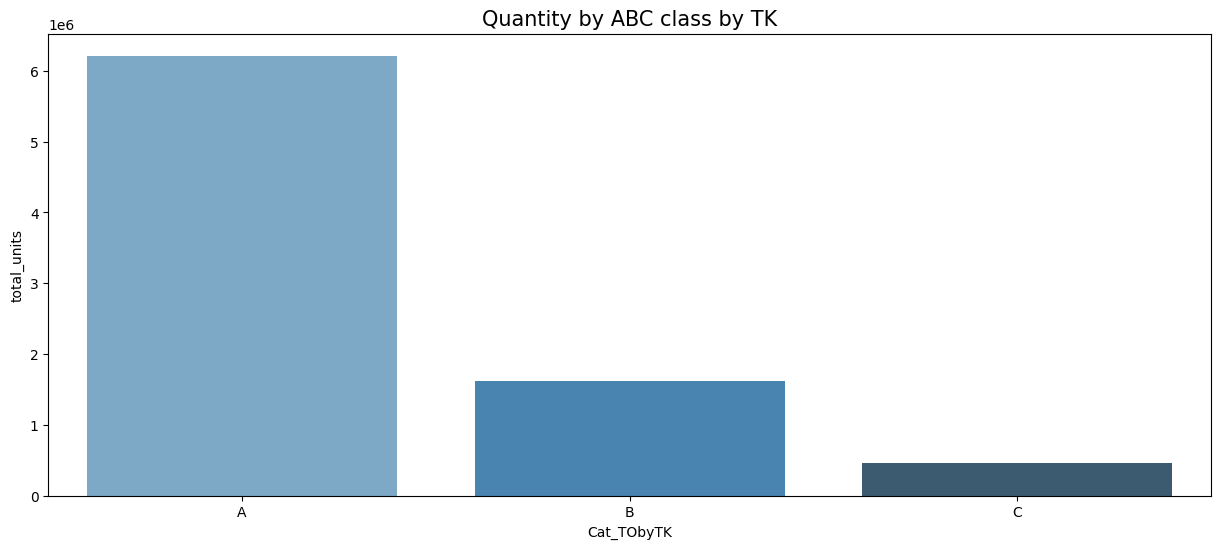

In [87]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="Cat_TObyTK",
                 y="total_units",
                 data=df_abc_byTK,
                 palette="Blues_d")\
                .set_title("Quantity by ABC class by TK",fontsize=15)

Рассмотрим результаты анализа по ТГ

In [88]:
df_abc_byTG = df_r_filtred.groupby('Cat_TObyTG').agg(
    total_skus=('Артикул', 'nunique'),
    total_units=('total_qty', sum),
    total_turn_over=('turn_over', sum),
).reset_index()

df_abc_byTG

,Cat_TObyTG,total_skus,total_units,total_turn_over
0,A,1612,6128633.0,1.217863e+09
1,B,1688,1611056.0,2.512740e+08
2,C,5100,553413.0,8.328064e+07


Рассмотрим результаты анализа по АГ

In [89]:
df_abc_byAG = df_r_filtred.groupby('Cat_TObyAG').agg(
    total_skus=('Артикул', 'nunique'),
    total_units=('total_qty', sum),
    total_turn_over=('turn_over', sum),
).reset_index()

df_abc_byAG

,Cat_TObyAG,total_skus,total_units,total_turn_over
0,A,1738,6193069.0,1.209862e+09
1,B,1682,1561483.0,2.541677e+08
2,C,4980,538550.0,8.838777e+07


Объединяем признаки

In [ ]:
df_r_filtred['ABCbyTK'] = df_r_filtred['Cat_TObyTK'] + df_r_filtred['Cat_RVbyTK'] + df_r_filtred['Cat_QTYbyTK']
df_r_filtred['ABCbyTG'] = df_r_filtred['Cat_TObyTG'] + df_r_filtred['Cat_RVbyTG'] + df_r_filtred['Cat_QTYbyTG']
df_r_filtred['ABCbyAG'] = df_r_filtred['Cat_TObyAG'] + df_r_filtred['Cat_RVbyAG'] + df_r_filtred['Cat_QTYbyAG']

Присваиваем рекомендованный Признак-Категорию

In [ ]:
df_r_filtred['CATbyTK'] = df_r_filtred['ABCbyTK'].apply(category)
df_r_filtred['CATbyTG'] = df_r_filtred['ABCbyTG'].apply(category)
df_r_filtred['CATbyAG'] = df_r_filtred['ABCbyAG'].apply(category)

In [ ]:
df_r_filtred.head()

,Артикул,Признак-категория,ТК,ТГ,АГ,turn_over,revenue,total_qty,%TObyTK,%RVbyTK,...,Cat_QTYbyTG,Cat_TObyAG,Cat_RVbyAG,Cat_QTYbyAG,ABCbyTK,ABCbyTG,ABCbyAG,CATbyTK,CATbyTG,CATbyAG
0,1000358,W,Расходные материалы для стерилизации,Журналы контроля и учета,Журналы контроля и учета,147118.51,5.157384e+04,1194.0,0.003703,0.004605,...,B,B,B,B,AAA,BBB,BBB,W,D,D
1,1000402,П,Инъекционные средства,Иглы медицинские,Иглы медицинские,50830.39,1.499650e+04,372.0,0.000359,0.000423,...,A,B,B,A,CCC,BBA,BBA,В,W,W
2,1000752,П,Медицинское оборудование,Термометры медицинские,Термометры ртутные,5861450.65,2.612914e+06,3828.0,0.043531,0.080642,...,B,A,A,C,AAA,AAB,AAC,W,W,D
3,1000881,И,Медицинская одежда,Головные уборы для пациентов и персонала,Головные уборы для пациентов и мед.персонала,469375.13,2.889060e+05,82.0,0.003840,0.008582,...,C,A,A,C,AAC,AAC,AAC,D,D,D
4,1000883,И,Медицинская одежда,Хирургическая одежда,Хирургическая одежда,447439.63,2.982931e+05,10.0,0.003660,0.008861,...,C,A,A,C,AAC,AAC,AAC,D,D,D


Возвращаем Признак П, его отрабатывают логисты

In [ ]:
df_r_filtred.loc[df_r_filtred['Признак-категория'] == "П", 'CATbyTK'] = "П"
df_r_filtred.loc[df_r_filtred['Признак-категория'] == "П", 'CATbyTG'] = "П"
df_r_filtred.loc[df_r_filtred['Признак-категория'] == "П", 'CATbyAG'] = "П"

Присваиваем Признак NEW в колонки с расчетом, к ним особое внимание

In [ ]:
df_r_filtred.loc[df_r_filtred['Артикул'] > 1705727, 'CATbyTK'] = "NEW"
df_r_filtred.loc[df_r_filtred['Артикул'] > 1705727, 'CATbyTG'] = "NEW"
df_r_filtred.loc[df_r_filtred['Артикул'] > 1705727, 'CATbyAG'] = "NEW"

Формируем конечный дата-фрейм

In [ ]:
df_final =df[['Артикул', 'Название товара','Признак-категория', 'ТК', 'ТГ', 'АГ', 'Бренд', 'Поставщик',\
              'ПМ', 'МЛ', 'Себ., руб']].merge(df_r_filtred[['Артикул', 'turn_over', 'revenue',\
              'total_qty', 'ABCbyTK', 'ABCbyTG', 'ABCbyAG', 'CATbyTK', 'CATbyTG', 'CATbyAG' ]],\
              left_on = 'Артикул', right_on = 'Артикул', how = 'left').merge(df1[['Артикул', 'АКБ',  ]],\
              left_on = 'Артикул', right_on = 'Артикул', how = 'left')

Проверка на приминимость ABC.
Считали только активные категории, при объединении получились нули на артикулах к которым расчет не пременим, заменяем значения на not appliccable

In [ ]:
import numpy as np
df_final['CATbyTK']= df_final['CATbyTK'].fillna("not_applicable")
df_final['CATbyTG']= df_final['CATbyTG'].fillna("not_applicable")
df_final['CATbyAG']= df_final['CATbyAG'].fillna("not_applicable")

Расставляем колонки в нужной последовательности

In [ ]:
df_final.columns

Index(['Артикул', 'Название товара', 'Признак-категория', 'ТК', 'ТГ', 'АГ',
       'Бренд', 'Поставщик', 'ПМ', 'МЛ', 'Себ., руб', 'turn_over', 'revenue',
       'total_qty', 'ABCbyTK', 'ABCbyTG', 'ABCbyAG', 'CATbyTK', 'CATbyTG',
       'CATbyAG', 'АКБ'],
      dtype='object')

In [ ]:
df_final = df_final[['Артикул', 'Название товара', 'Признак-категория', 'ТК', 'ТГ', 'АГ',
       'Бренд', 'Поставщик', 'ПМ', 'МЛ', 'Себ., руб', 'turn_over', 'revenue',
       'total_qty', 'АКБ','ABCbyTK', 'ABCbyTG', 'ABCbyAG', 'CATbyTK', 'CATbyTG',
       'CATbyAG' ]]

In [ ]:
df_final.head()

,Артикул,Название товара,Признак-категория,ТК,ТГ,АГ,Бренд,Поставщик,ПМ,МЛ,...,turn_over,revenue,total_qty,АКБ,ABCbyTK,ABCbyTG,ABCbyAG,CATbyTK,CATbyTG,CATbyAG
0,1000358,Журнал регистрации температуры в холодильном о...,W,Расходные материалы для стерилизации,Журналы контроля и учета,Журналы контроля и учета,Винар,ООО ТОРГОВЫЙ ДОМ ВИНАР-М,Шалдыбин Сергей Геннадьевич,Мартенюк Надежда Александровна,...,147118.51,5.157384e+04,1194.0,331.0,AAA,BBB,BBB,W,D,D
1,1000402,"Игла инъекционная 23G (0,6х25 мм) Komar Россия...",П,Инъекционные средства,Иглы медицинские,Иглы медицинские,Komar,"ООО ""СПЕЦМЕДТОРГ""",Афанасьев Егор Федорович,Курганова Ольга Николаевна,...,50830.39,1.499650e+04,372.0,62.0,CCC,BBA,BBA,П,П,П
2,1000752,"Гигрометр психрометрический ВИТ-1, Термоприбор...",П,Медицинское оборудование,Термометры медицинские,Термометры ртутные,Термоприбор,"ООО ""ТД ""ТЕРМОПРИБОР""",Гусев Вячеслав Павлович,Горшкова Екатерина Сергеевна,...,5861450.65,2.612914e+06,3828.0,88.0,AAA,AAB,AAC,П,П,П
3,1000881,"Предметы мед.назнач-я Берет Protect Universal,...",И,Медицинская одежда,Головные уборы для пациентов и персонала,Головные уборы для пациентов и мед.персонала,ES-Kompressen,ООО ПАУЛЬ ХАРТМАНН,Сёмина Жанна Анатольевна,Попова Надежда Александровна,...,469375.13,2.889060e+05,82.0,4.0,AAC,AAC,AAC,D,D,D
4,1000883,Халат хирургический стерил. Protect Standard ...,И,Медицинская одежда,Хирургическая одежда,Хирургическая одежда,ES-Kompressen,ООО ПАУЛЬ ХАРТМАНН,Сёмина Жанна Анатольевна,Попова Надежда Александровна,...,447439.63,2.982931e+05,10.0,1.0,AAC,AAC,AAC,D,D,D


In [ ]:
df_final.to_excel('ABC.xlsx', index = False)

# XYZ Classification

In [ ]:
def xyz_classify_product(cov):
    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

Формируем датафрейм по количеству продаж за год

In [ ]:
df_12m_units = df[['Артикул','Признак-категория','2022_06(A) Объем реализации, шт',\
                                                 '2022_07(A) Объем реализации, шт',\
                                                 '2022_08(A) Объем реализации, шт',\
                                                 '2022_09(A) Объем реализации, шт',\
                                                 '2022_10(A) Объем реализации, шт',\
                                                 '2022_11(A) Объем реализации, шт',\
                                                 '2022_12(A) Объем реализации, шт',\
                                                 '2023_01(A) Объем реализации, шт',\
                                                 '2023_02(A) Объем реализации, шт',\
                                                 '2023_03(A) Объем реализации, шт',\
                                                 '2023_04(A) Объем реализации, шт',\
                                                 '2023_05(A) Объем реализации, шт']]

Переименуем столбцы для удобства работы

In [ ]:
df_12m_units.columns = ['Артикул','Признак-категория','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']

Отбираем нужные категории для анализа

In [ ]:
df_12m_units = df_12m_units[(df_12m_units['Признак-категория'] == 'D') |\
                            (df_12m_units['Признак-категория'] == 'W') |\
                            (df_12m_units['Признак-категория'] == 'S') |\
                            (df_12m_units['Признак-категория'] == 'П') |\
                            (df_12m_units['Признак-категория'] == 'И')]

In [ ]:
df_12m_units['std_demand'] = df_12m_units[['m1','m2','m3','m4','m5','m6','m7',\
                                           'm8','m9','m10','m11','m12']].std(axis=1)

In [ ]:
df_12m_units = df_12m_units.assign(total_demand = df_12m_units['m1'] + df_12m_units['m2'] +\
                                                  df_12m_units['m3'] + df_12m_units['m4'] +\
                                                  df_12m_units['m5'] + df_12m_units['m6'] +\
                                                  df_12m_units['m7'] + df_12m_units['m8'] +\
                                                  df_12m_units['m9'] + df_12m_units['m10'] +\
                                                  df_12m_units['m11'] + df_12m_units['m12'])

In [ ]:
df_12m_units = df_12m_units.assign(avg_demand = df_12m_units['total_demand'] / 12 )

In [ ]:
df_12m_units['cov_demand'] = df_12m_units['std_demand'] / df_12m_units['avg_demand']

In [ ]:
df_12m_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6712 entries, 0 to 9773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Артикул            6712 non-null   int64  
 1   Признак-категория  6712 non-null   object 
 2   m1                 6712 non-null   float64
 3   m2                 6712 non-null   float64
 4   m3                 6712 non-null   float64
 5   m4                 6712 non-null   float64
 6   m5                 6712 non-null   float64
 7   m6                 6712 non-null   float64
 8   m7                 6712 non-null   float64
 9   m8                 6712 non-null   float64
 10  m9                 6712 non-null   float64
 11  m10                6712 non-null   float64
 12  m11                6712 non-null   float64
 13  m12                6712 non-null   float64
 14  std_demand         6712 non-null   float64
 15  total_demand       6712 non-null   float64
 16  avg_demand         6712 

Убираем деление отрицательные значения и ошибки нуля

In [ ]:
df_12m_units.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df_12m_units = df_12m_units[(df_12m_units['cov_demand'] >=0) ]

анализируем максимум и минимум

In [ ]:
df_12m_units.sort_values(by='cov_demand', ascending=False).head()

,Артикул,Признак-категория,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
649,1210168,D,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,-19.0,0.0,0.0,8.540013,3.0,0.250000,34.160051
7364,335953,D,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,-30.0,0.0,13.446583,5.0,0.416667,32.271800
8167,514405,И,0.0,2.0,0.0,2.0,2.0,0.0,4.0,0.0,122.0,-116.0,0.0,3.0,50.764086,19.0,1.583333,32.061528
3119,1559295,И,0.0,0.0,0.0,0.0,0.0,10.0,-8.0,0.0,0.0,0.0,0.0,0.0,3.857303,2.0,0.166667,23.143819
5791,1763261,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-6.0,0.0,3.498918,4.0,0.333333,10.496753


In [ ]:
df_12m_units.sort_values(by='cov_demand', ascending=True).head(5)

,Артикул,Признак-категория,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
2435,1467878,W,1593.0,1738.0,1085.0,1403.0,1333.0,1595.0,1418.0,1775.0,1458.0,1495.0,1297.0,1413.0,191.554150,17603.0,1466.916667,0.130583
7832,481358,W,1352.0,1257.0,1416.0,1497.0,1365.0,1675.0,1823.0,1595.0,1728.0,1733.0,1912.0,1715.0,208.329285,19068.0,1589.000000,0.131107
7193,213112,W,2263.0,2016.0,1507.0,1978.0,2011.0,1831.0,2071.0,1474.0,1691.0,2004.0,2288.0,1571.0,277.339129,22705.0,1892.083333,0.146579
429,1093287,W,451.0,405.0,569.0,543.0,539.0,530.0,728.0,478.0,578.0,596.0,625.0,604.0,85.221458,6646.0,553.833333,0.153876
548,119454,W,176.0,209.0,183.0,205.0,167.0,205.0,143.0,217.0,193.0,153.0,155.0,137.0,27.586091,2143.0,178.583333,0.154472


In [ ]:
df_12m_units['cov_demand'].min()

0.13058284390820762

In [ ]:
df_12m_units['cov_demand'].mean()

1.5786608202791028

In [ ]:
df_12m_units['cov_demand'].max()

34.16005109640633

In [ ]:
df_12m_units['xyz_class'] = df_12m_units['cov_demand'].apply(xyz_classify_product)
df_12m_units.xyz_class.value_counts()

Z    4095
Y    1892
X     725
Name: xyz_class, dtype: int64

Считаем статистики

In [ ]:
df_12m_units.groupby('xyz_class').agg(
    total_skus=('Артикул', 'nunique'),
    total_demand=('total_demand', 'sum'),
    std_demand=('std_demand', 'mean'),
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

In [ ]:
df_12m_units.head(10)

,Артикул,Признак-категория,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,1000358,W,128.0,181.0,175.0,393.0,133.0,286.0,313.0,188.0,189.0,201.0,125.0,178.0,81.894056,2490.0,207.500000,0.394670,X
1,1000402,П,71.0,61.0,56.0,56.0,38.0,68.0,65.0,23.0,16.0,126.0,52.0,90.0,29.157358,722.0,60.166667,0.484610,X
2,1000752,П,35.0,-2.0,0.0,112.0,35.0,260.0,541.0,721.0,1143.0,507.0,370.0,546.0,353.636777,4268.0,355.666667,0.994293,Y
3,1000881,И,120.0,0.0,8.0,8.0,21.0,0.0,25.0,32.0,0.0,0.0,24.0,1.0,33.622120,239.0,19.916667,1.688140,Z
4,1000883,И,0.0,7.0,0.0,0.0,5.0,5.0,0.0,10.0,0.0,0.0,0.0,0.0,3.545163,27.0,2.250000,1.575628,Z
5,1000890,И,5.0,10.0,5.0,5.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,4.330127,45.0,3.750000,1.154701,Z
12,1002237,D,0.0,0.0,36.0,90.0,26.0,136.0,78.0,210.0,117.0,283.0,68.0,48.0,85.326112,1092.0,91.000000,0.937650,Y
13,1002238,И,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.151462,11.0,0.916667,2.347049,Z
14,1003289,D,401.0,1034.0,1041.0,364.0,380.0,257.0,598.0,590.0,414.0,668.0,462.0,219.0,269.350510,6428.0,535.666667,0.502832,Y
15,1003290,D,215.0,298.0,200.0,596.0,205.0,219.0,235.0,272.0,260.0,377.0,336.0,273.0,110.334615,3486.0,290.500000,0.379809,X


Разворачиваем данные по классам и месяцам для построения графиков

In [ ]:
df_monthly = df_12m_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)

df_monthly.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,467474.0,469102.0,609914.0,609890.0,658734.0,629476.0,639484.0,440206.0,580152.0,750370.0,675795.0,663261.0
Y,300620.0,291822.0,408282.0,450065.0,441368.0,518038.0,537813.0,391736.0,497260.0,681262.0,569623.0,587099.0
Z,142268.0,122169.0,168761.0,140525.0,175319.0,175132.0,170997.0,132767.0,176903.0,254200.0,287683.0,256500.0


Формируем Датафрейм по месяцам, классам и количеству шт

In [ ]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,m1,X,467474.0
1,m1,Y,300620.0
2,m1,Z,142268.0
3,m2,X,469102.0
4,m2,Y,291822.0


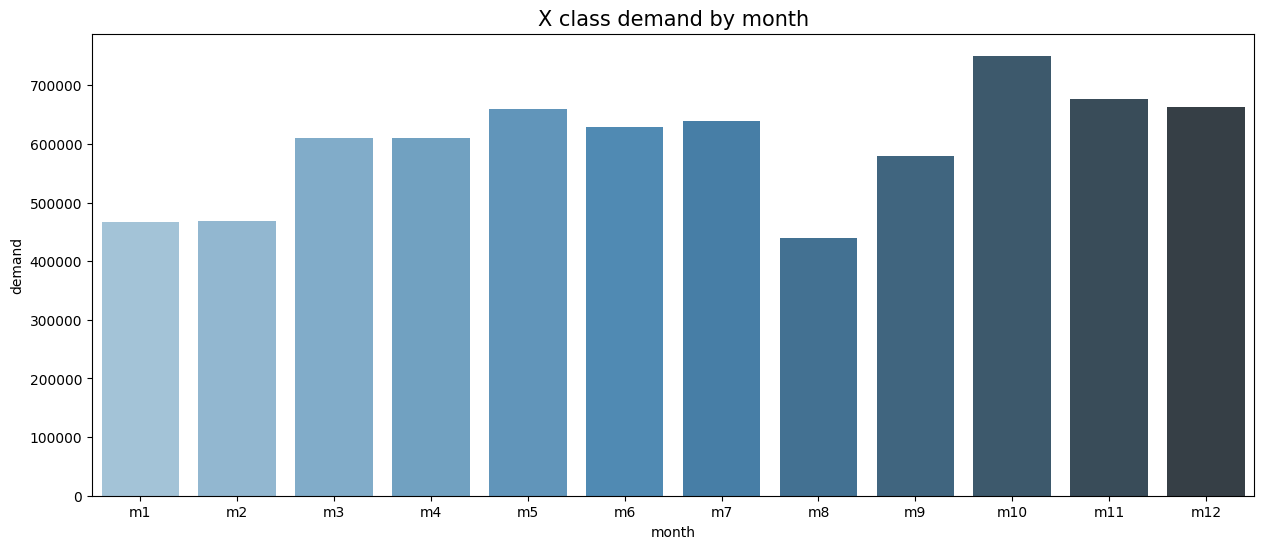

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="demand",
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='X'],
                 palette="Blues_d")\
                 .set_title("X class demand by month",fontsize=15)

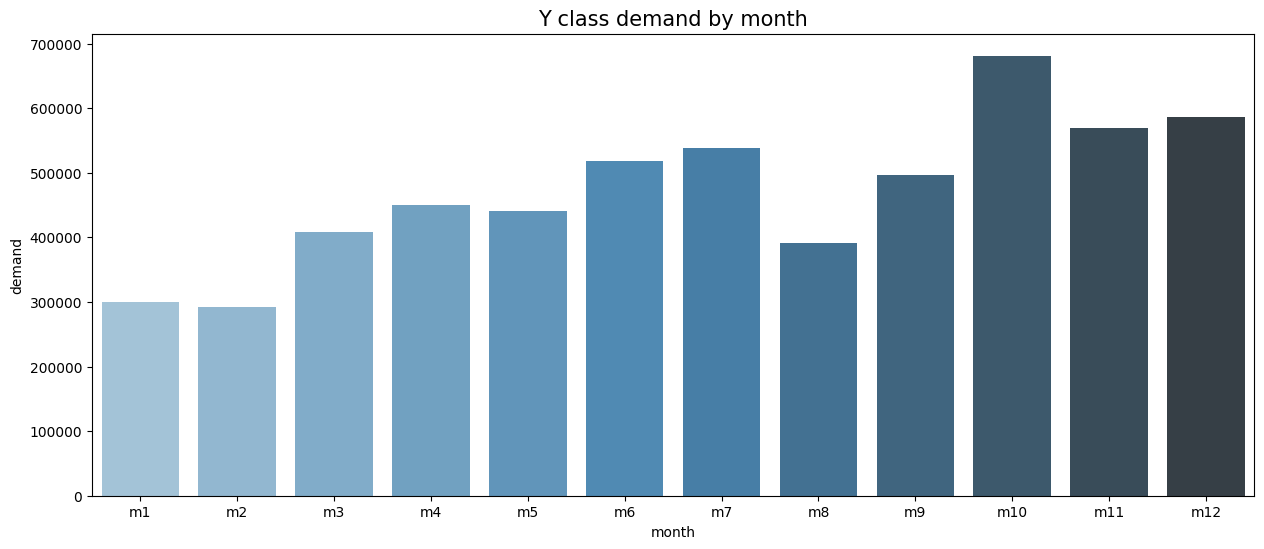

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="demand",
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Y'],
                 palette="Blues_d")\
                 .set_title("Y class demand by month",fontsize=15)

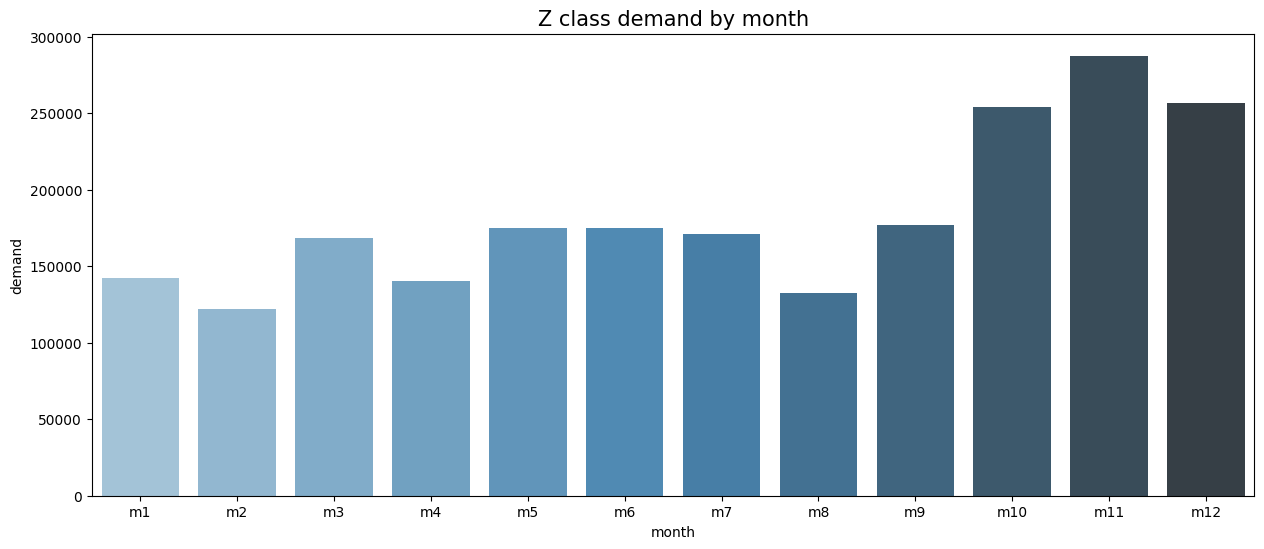

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="demand",
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Z'],
                 palette="Blues_d")\
                 .set_title("Z class demand by month",fontsize=15)

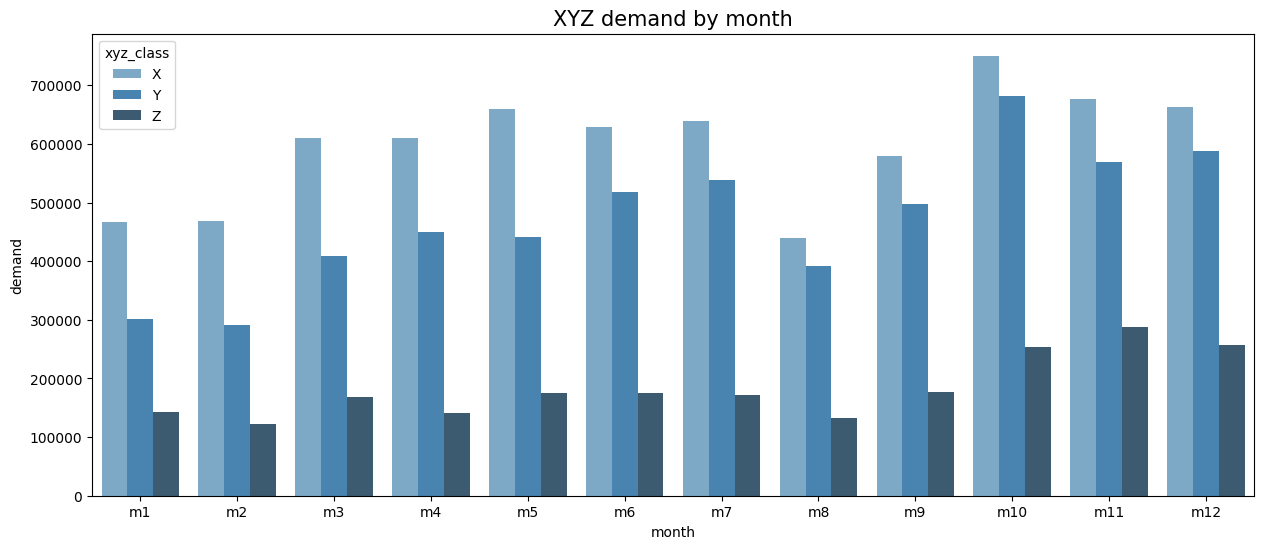

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="demand",
                 hue="xyz_class",
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)

#ABC_XYZ Classification

In [ ]:
def understending(arg):
  if arg == "AX":
    return 'Высокая ценность, устойчивый спрос, легко прогнозировать, просто управлять'
  elif arg == "BX":
    return 'Средняя ценность, устойчивый спрос, легко прогнозировать, просто управлять'
  elif arg == "CX":
    return 'Низкая ценность, устойчивый спрос, легко прогнозировать, просто управлять'
  elif arg == "AY":
    return 'Высокая ценность, переменный спрос, сложнее прогнозировать, сложнее управлять'
  elif arg == "BY":
    return 'Средняя ценность, переменный спрос, сложнее прогнозировать, сложнее управлять'
  elif arg == "CY":
    return 'Низкая ценность, переменный спрос, сложнее прогнозировать, сложнее управлять'
  elif arg == "AZ":
    return 'Высокий ценность, спонтанный спрос, трудно прогнозировать, трудно управлять'
  elif arg == "BZ":
    return 'Средняя ценность, спонтанный спрос, трудно прогнозировать, трудно управлять'
  elif arg == "CZ":
    return 'Низкая ценность, спонтанный спрос, трудно прогнозировать, трудно управлять'
  elif arg == "Cnan":
    return 'Нет продаж'

In [ ]:
def managment(arg):
  if arg == "AX":
    return 'Автоматическое пополнение, низкий буфер, управление JIT'
  elif arg == "BX":
    return 'Автоматическое пополнение, переодический подсчет, низкий буфер'
  elif arg == "CX":
    return 'Автоматическое пополнение, переодическая оценка, низкий буфер'
  elif arg == "AY":
    return 'Полуавтоматическое пополнение, низкий буфер'
  elif arg == "BY":
    return 'Полуавтоматическое пополнение, сезонный буфер скорректированный вручную'
  elif arg == "CY":
    return 'Полуавтоматическое пополнение, высокий буфер'
  elif arg == "AZ":
    return 'Поставка под заказ, нет буфера, нет запаса'
  elif arg == "BZ":
    return 'Поставка под заказ, нет буфера, указано время поставки, нет запаса'
  elif arg == "CZ":
    return 'Автоматическое пополнение, высокий буфер, переодическая оценка'
  elif arg == "Cnan":
    return 'Вывод из матрицы если не новинка'

In [ ]:
df_xyz = df_12m_units.copy()

In [ ]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6712 entries, 0 to 9773
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Артикул            6712 non-null   int64  
 1   Признак-категория  6712 non-null   object 
 2   m1                 6712 non-null   float64
 3   m2                 6712 non-null   float64
 4   m3                 6712 non-null   float64
 5   m4                 6712 non-null   float64
 6   m5                 6712 non-null   float64
 7   m6                 6712 non-null   float64
 8   m7                 6712 non-null   float64
 9   m8                 6712 non-null   float64
 10  m9                 6712 non-null   float64
 11  m10                6712 non-null   float64
 12  m11                6712 non-null   float64
 13  m12                6712 non-null   float64
 14  std_demand         6712 non-null   float64
 15  total_demand       6712 non-null   float64
 16  avg_demand         6712 

In [ ]:
df_abc = df_r_filtred.copy()

In [ ]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 9773
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Артикул            8400 non-null   int64  
 1   Признак-категория  8400 non-null   object 
 2   ТК                 8400 non-null   object 
 3   ТГ                 8400 non-null   object 
 4   АГ                 8400 non-null   object 
 5   turn_over          8400 non-null   float64
 6   revenue            8400 non-null   float64
 7   total_qty          8400 non-null   float64
 8   %TObyTK            8392 non-null   float64
 9   %RVbyTK            8392 non-null   float64
 10  %QTYbyTK           8392 non-null   float64
 11  %TObyTG            8390 non-null   float64
 12  %RVbyTG            8390 non-null   float64
 13  %QTYbyTG           8390 non-null   float64
 14  %TObyAG            8344 non-null   float64
 15  %RVbyAG            8344 non-null   float64
 16  %QTYbyAG           8344 

In [ ]:
df_abc_xyz = df_abc.merge(df_xyz, on='Артикул', how='left')


In [ ]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['Cat_TObyTK'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [ ]:
df_abc_xyz['understanding'] = df_abc_xyz['abc_xyz_class'].apply(understending)

In [ ]:
df_abc_xyz['managment'] = df_abc_xyz['abc_xyz_class'].apply(managment)

In [ ]:
df_abc_xyz.head()

,Артикул,Признак-категория_x,ТК,ТГ,АГ,turn_over,revenue,total_qty,%TObyTK,%RVbyTK,...,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class,understanding,managment
0,1000358,W,Расходные материалы для стерилизации,Журналы контроля и учета,Журналы контроля и учета,147118.51,5.157384e+04,1194.0,0.003703,0.004605,...,125.0,178.0,81.894056,2490.0,207.500000,0.394670,X,AX,"Высокая ценность, устойчивый спрос, легко прог...","Автоматическое пополнение, низкий буфер, управ..."
1,1000402,П,Инъекционные средства,Иглы медицинские,Иглы медицинские,50830.39,1.499650e+04,372.0,0.000359,0.000423,...,52.0,90.0,29.157358,722.0,60.166667,0.484610,X,CX,"Низкая ценность, устойчивый спрос, легко прогн...","Автоматическое пополнение, переодическая оценк..."
2,1000752,П,Медицинское оборудование,Термометры медицинские,Термометры ртутные,5861450.65,2.612914e+06,3828.0,0.043531,0.080642,...,370.0,546.0,353.636777,4268.0,355.666667,0.994293,Y,AY,"Высокая ценность, переменный спрос, сложнее пр...","Полуавтоматическое пополнение, низкий буфер"
3,1000881,И,Медицинская одежда,Головные уборы для пациентов и персонала,Головные уборы для пациентов и мед.персонала,469375.13,2.889060e+05,82.0,0.003840,0.008582,...,24.0,1.0,33.622120,239.0,19.916667,1.688140,Z,AZ,"Высокий ценность, спонтанный спрос, трудно про...","Поставка под заказ, нет буфера, нет запаса"
4,1000883,И,Медицинская одежда,Хирургическая одежда,Хирургическая одежда,447439.63,2.982931e+05,10.0,0.003660,0.008861,...,0.0,0.0,3.545163,27.0,2.250000,1.575628,Z,AZ,"Высокий ценность, спонтанный спрос, трудно про...","Поставка под заказ, нет буфера, нет запаса"


In [ ]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('Артикул', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),
    total_turn_over=('turn_over', sum),
).reset_index()

df_abc_xyz_summary.sort_values(by='total_turn_over', ascending=False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_turn_over
0,AX,424,6341416.0,1246.347484,6.191826e+08
1,AY,563,3798579.0,562.252664,4.448937e+08
2,AZ,350,836838.0,199.247143,1.740631e+08
4,BY,663,1504634.0,189.119407,9.670821e+07
5,BZ,779,765610.0,81.900941,9.187355e+07
8,CZ,2966,600776.0,16.879523,4.926621e+07
3,BX,218,739397.0,282.644113,4.704032e+07
7,CY,666,371775.0,46.518393,2.481627e+07
6,CX,83,113045.0,113.498996,4.648428e+06
9,Cnan,1688,0.0,NaN,-7.444000e+04


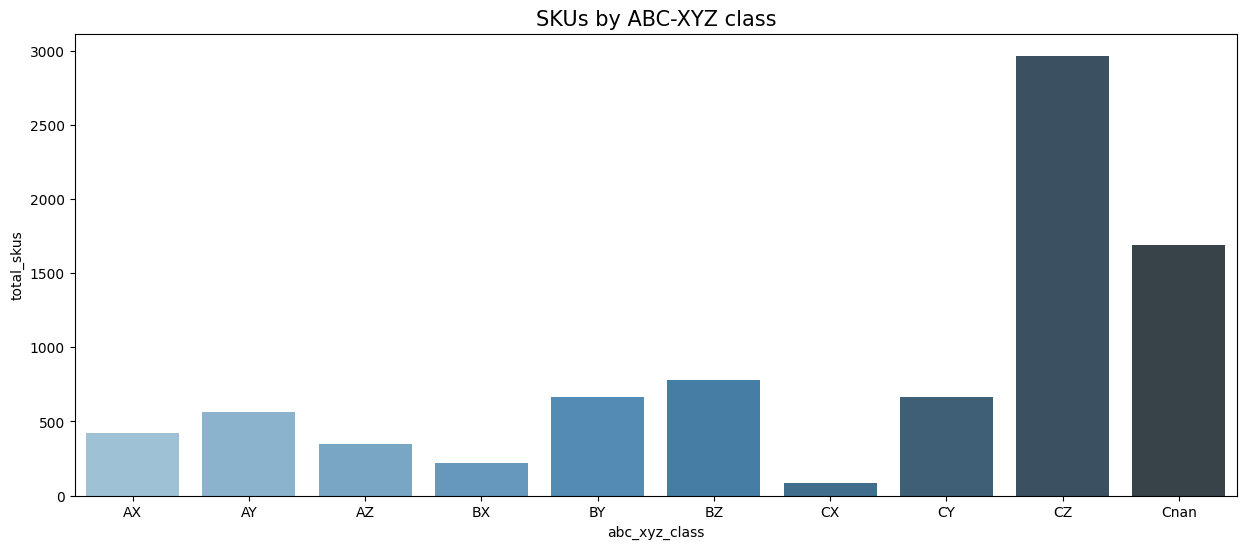

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_skus",
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)

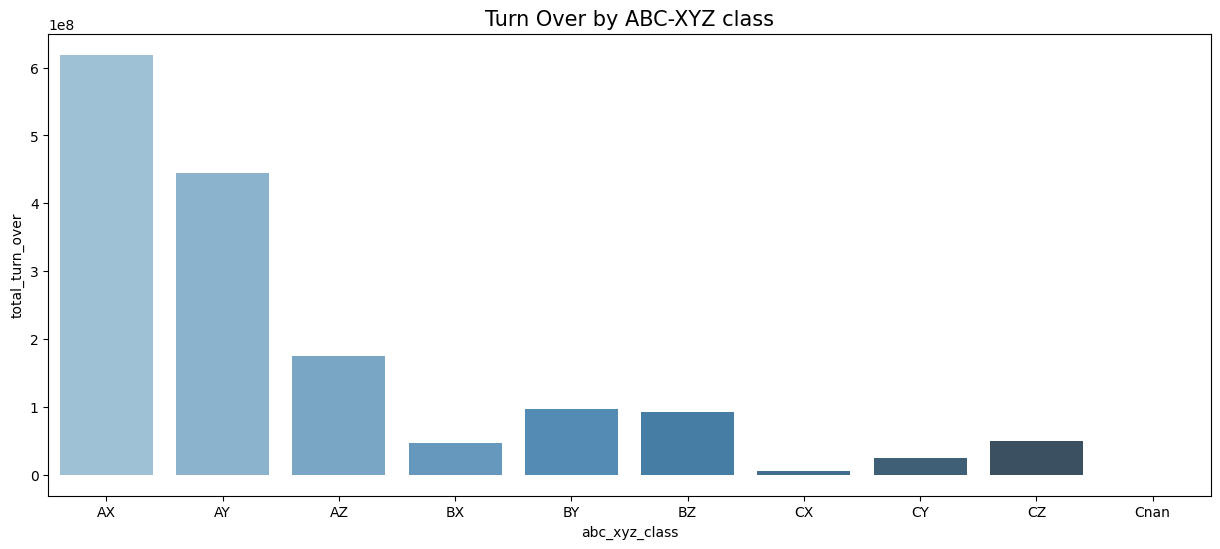

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_turn_over",
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("Turn Over by ABC-XYZ class",fontsize=15)

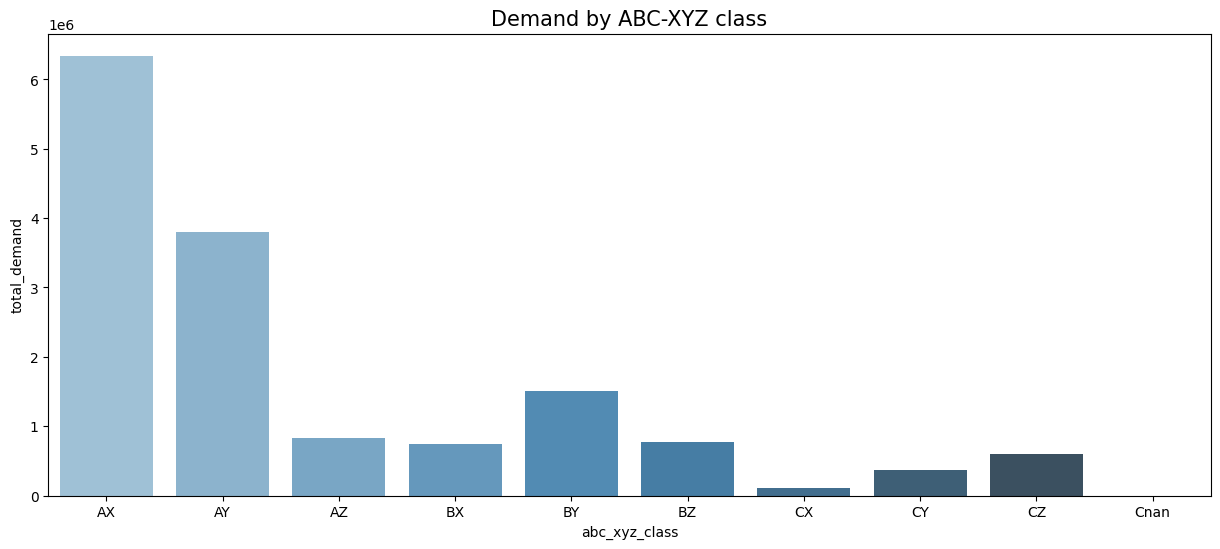

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_demand",
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

In [79]:
df_final = df_final.merge(df_abc_xyz[['Артикул', 'abc_xyz_class',	'understanding',	'managment']],\
                          left_on = 'Артикул', right_on = 'Артикул', how = 'left')

In [80]:
df_final.head()

,Артикул,Название товара,Признак-категория,ТК,ТГ,АГ,Бренд,Поставщик,ПМ,МЛ,...,АКБ,ABCbyTK,ABCbyTG,ABCbyAG,CATbyTK,CATbyTG,CATbyAG,abc_xyz_class,understanding,managment
0,1000358,Журнал регистрации температуры в холодильном о...,W,Расходные материалы для стерилизации,Журналы контроля и учета,Журналы контроля и учета,Винар,ООО ТОРГОВЫЙ ДОМ ВИНАР-М,Шалдыбин Сергей Геннадьевич,Мартенюк Надежда Александровна,...,331.0,AAA,BBB,BBB,W,D,D,AX,"Высокая ценность, устойчивый спрос, легко прог...","Автоматическое пополнение, низкий буфер, управ..."
1,1000402,"Игла инъекционная 23G (0,6х25 мм) Komar Россия...",П,Инъекционные средства,Иглы медицинские,Иглы медицинские,Komar,"ООО ""СПЕЦМЕДТОРГ""",Афанасьев Егор Федорович,Курганова Ольга Николаевна,...,62.0,CCC,BBA,BBA,П,П,П,CX,"Низкая ценность, устойчивый спрос, легко прогн...","Автоматическое пополнение, переодическая оценк..."
2,1000752,"Гигрометр психрометрический ВИТ-1, Термоприбор...",П,Медицинское оборудование,Термометры медицинские,Термометры ртутные,Термоприбор,"ООО ""ТД ""ТЕРМОПРИБОР""",Гусев Вячеслав Павлович,Горшкова Екатерина Сергеевна,...,88.0,AAA,AAB,AAC,П,П,П,AY,"Высокая ценность, переменный спрос, сложнее пр...","Полуавтоматическое пополнение, низкий буфер"
3,1000881,"Предметы мед.назнач-я Берет Protect Universal,...",И,Медицинская одежда,Головные уборы для пациентов и персонала,Головные уборы для пациентов и мед.персонала,ES-Kompressen,ООО ПАУЛЬ ХАРТМАНН,Сёмина Жанна Анатольевна,Попова Надежда Александровна,...,4.0,AAC,AAC,AAC,D,D,D,AZ,"Высокий ценность, спонтанный спрос, трудно про...","Поставка под заказ, нет буфера, нет запаса"
4,1000883,Халат хирургический стерил. Protect Standard ...,И,Медицинская одежда,Хирургическая одежда,Хирургическая одежда,ES-Kompressen,ООО ПАУЛЬ ХАРТМАНН,Сёмина Жанна Анатольевна,Попова Надежда Александровна,...,1.0,AAC,AAC,AAC,D,D,D,AZ,"Высокий ценность, спонтанный спрос, трудно про...","Поставка под заказ, нет буфера, нет запаса"


In [81]:
df_final.to_excel('ABC_XYZ.xlsx', index = False)